# Lab 1.1
## Section 1: Running Code in Jupyter Notebook

First, we need to import modules that we want our code to use. These modules include built-in functions. For information on each module and function, including what they return or their arguments (inputs), look at the documentation. You can find the documentation by googling the module or the module.function().

In [6]:
# Module to read .xlsx (Excel) file
import xlrd

# Module to plot
# The "as plt" names the module plt, making it quicker to use later
# To call functions from this module, we can type plt.function() rather than matplotlib.pyplot.function()
import matplotlib.pyplot as plt

# Module with many functions in manipulating arrays and lists
import numpy as np

# Module with statistics functions
import statistics as stats

# Module with normal gaussian curve function
# Since we don't need the entire scipy.stats library, we add "import norm" to only import the norm function
from scipy.stats import norm

Next, we need a way to parse through the .xlsx data. We will do this using the functions we imported from the xlrd library. These functions allow us to create objects from the .xlsx data that Python recognizes, including workbooks and sheets. We can then turn these into arrays of data points which we can plot later.

In [15]:
# Define the location of the .xlsx file. These are the names of the files, uploaded to the same folder as your Jupyter Notebook.
Skykomish_Data = ('Skykomish_peak_flow_12134500_skykomish_river_near_gold_bar.xlsx')

# Create workbooks and sheets using xlrd module and the location that we defined above. 
# This allows us to look through the data later.
Skykomish_wb = xlrd.open_workbook(Skykomish_Data)
Skykomish_Sheet = Skykomish_wb.sheet_by_index(0)

# Now we will create and populate years array and peak values array using the data in Skykomish_Sheet.
# Skykyomish_Year will contain the years that data was collected.
# Skykomish_Peak will contain the peak flow values for each year.

# First, we define empty arrays for each.
Skykomish_Year = []
Skykomish_Peak = []  

# Next, we will use a for loop to put the data from the Skykomish_Sheet into the arrays we created.
# i is the index which will keep track of where we are in the arrays.
# Skykomish has 1 row of comments before data, so we define i to start after 1 so we skip the comments and end at the last row.
for i in range(1,Skykomish_Sheet.nrows):
    
    # Looking at the Excel data, the years are given in the second column. Column indexes start at 0, so the second column is 1.
    # The .append() function adds the data point to the end of the array.
    # The .cell_value() returns  data point at (row, column) from the sheet.
    Skykomish_Year.append(Skykomish_Sheet.cell_value(i,1))
    
    # The peak flow values are in column 3 of the data, so this is column index 2.
    Skykomish_Peak.append(Skykomish_Sheet.cell_value(i,2))

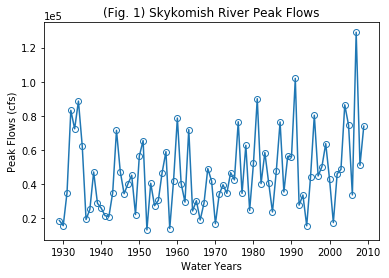

In [16]:
# Now, we will plot the data as a time series.

# Plot data
plt.figure(1)
plt.plot(Skykomish_Year, Skykomish_Peak, '-o', markerfacecolor="None")

# Change plot labels
plt.xlabel('Water Years')
plt.ylabel('Peak Flows (cfs)')
plt.title('(Fig. 1) Skykomish River Peak Flows')
plt.ticklabel_format(axis='x', useOffset=False)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

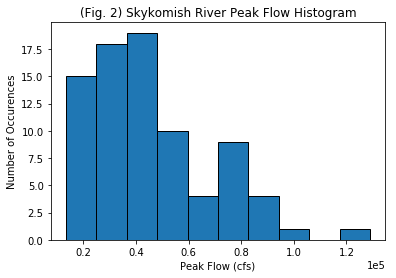

In [17]:
# Next, we will plot the data as a histogram.

# Define the number of bins for the histogram.
nbins = 10

# Plot the histogram.
plt.figure(2)
plt.hist(Skykomish_Peak, nbins, ec="black")

# Label.
plt.title('(Fig. 2) Skykomish River Peak Flow Histogram')
plt.xlabel('Peak Flow (cfs)')
plt.ylabel('Number of Occurences')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))

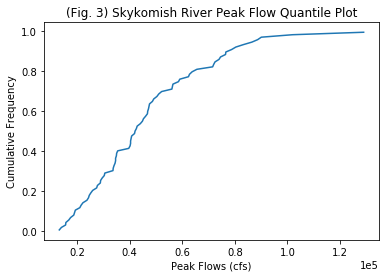

In [18]:
# Next, we will plot the data as a quantile plot.

# We will create a function that will return the objects needed to plot the data for a quantile plot.
# Name the function "quantile_fn" and allow it to take in an array of data.
def quantile_fn(data):

    # Create an array of ordered data using the "sorted" function.
    ordered_data = sorted(data)
    
    # Define the length of the ordered_data array.
    n = len(ordered_data)

    # Assign a rank and plotting position to each data point.
    rank = []
    plotting_position = []
    for i in range(n):
        rank.append(i+1)
        # Using the Cunnane plotting position.
        plotting_position.append((rank[i]-.4)/(n+.2))
        
    # The function will return the arrays ordered_data and plotting_position.    
    return ordered_data, plotting_position

# Call quantile function defined above with our data.
Skykomish_Data, Skykomish_Plotting = quantile_fn(Skykomish_Peak)
    
# Plot data by plotting position.
plt.figure(3)
plt.plot(Skykomish_Data, Skykomish_Plotting)
plt.xlabel('Peak Flows (cfs)')
plt.ylabel('Cumulative Frequency')
plt.title('(Fig. 3) Skykomish River Peak Flow Quantile Plot')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))

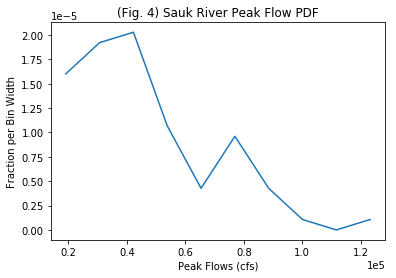

In [19]:
# Next, plotting the data as a PDF.

# Create a function for the PDF.
# The function will take in the array of data and number of bins used for the histogram.
def pdf_fn(data, nbins):
    
    # Pull counts for each bin (counts), the locations of the left sides of each bin and right side of the last bin (bins), 
    # and style tags (patches) from the histogram plot.
    counts, bins, patches = plt.hist(data, nbins)
    # Close the histogram so that it does not display.
    plt.close()
    
    # Create an array with the center of each bin.
    width = bins[2]-bins[1]
    centers = bins + width/2
    # plt.hist() returns the right side of the last bin, which we don't want in the centers array.
    # To get rid of this, first convert the centers array to a list.
    centers_list = np.array(centers).tolist()
    # Then, remove from the end of the list.
    centers_list.remove(centers_list[len(centers_list)-1])

    # Calculate the area under the curve.
    areas = [c * width for c in counts]
    area_under_curve = sum(areas)

    # Calculate the fraction of area vs counts
    fractions = [c / area_under_curve for c in counts]
    
    return centers_list, fractions

# Call PDF function with our data.
nbins = 10
centers_list, fractions = pdf_fn(Skykomish_Peak, nbins)

# Plot PDF.
plt.figure(4)
plt.plot(centers_list, fractions)
plt.xlabel('Peak Flows (cfs)')
plt.ylabel('Fraction per Bin Width')
plt.title('(Fig. 4) Sauk River Peak Flow PDF')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

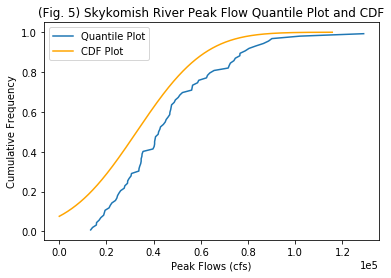

In [20]:
# Plotting the data as a CDF.

# Function for CDF
def make_cdf(data):
    mean = stats.mean(data)
    sd = stats.stdev(data)
    n = len(data)
    num = int(data[n-1]-data[0])
    return np.linspace(data[0], data[n-1], num), mean, sd

# Call CDF function for data
x, mean, sd = make_cdf(Skykomish_Data)

# Plot 
plt.figure(5)
plt.plot(Skykomish_Data, Skykomish_Plotting, label="Quantile Plot")
plt.plot(norm.cdf(x, mean, sd), color='orange', label='CDF Plot')
plt.xlabel('Peak Flows (cfs)')
plt.ylabel('Cumulative Frequency')
plt.title('(Fig. 5) Skykomish River Peak Flow Quantile Plot and CDF')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.legend(loc="best")

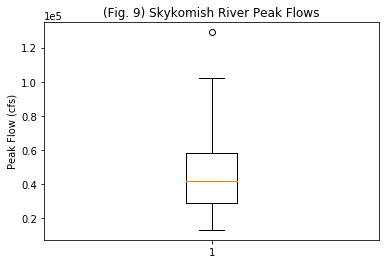

In [25]:
# Next, plotting the data as a boxplot.

plt.figure(6)
plt.boxplot(Skykomish_Peak)
plt.ylabel('Peak Flow (cfs)')
plt.title('(Fig. 9) Skykomish River Peak Flows')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))